# Part 1

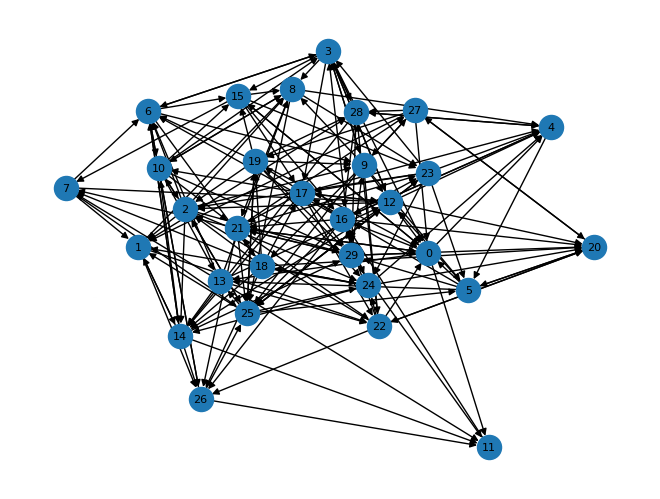

In [296]:
#1
import matplotlib.pyplot as plt
import networkx as nx

graph = nx.gnp_random_graph(30, 0.2, directed=True)

nx.draw(graph, with_labels=True, font_size=8)

In [297]:
#2 

In [298]:
import numpy as np
#note that the graphs that networkx produces never have any nodes with outdegree of 0, so we dont need to account for that
def pr(graph, damping=0.85, i=100):
    total_nodes = graph.number_of_nodes()
    adj = nx.to_numpy_array(graph, weight=None) #convert to np array
    adj = adj / np.sum(adj, axis=1).reshape(-1, 1)
    adj = adj.T

    pr = np.ones(total_nodes) #array of ones based on total nodes

    for v in range(i):
        temp_pr = (1-damping)/total_nodes +damping * np.dot(adj, pr) #formula
        pr = temp_pr

    return_dict = {}
    for node, pr_score in zip(graph.nodes(), pr): #return in order
        return_dict[node] = pr_score

    return return_dict

In [299]:
pr_scores = pr(graph)
print(f"Keys: {pr_scores.keys()} \n Values: {pr_scores.values()}")

Keys: dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]) 
 Values: dict_values([np.float64(0.03956927196729283), np.float64(0.03104773915192618), np.float64(0.02862494898162877), np.float64(0.03350013498799375), np.float64(0.042380119272829905), np.float64(0.04014175237238393), np.float64(0.042846112075569515), np.float64(0.01745583957064164), np.float64(0.02898469147270131), np.float64(0.026870565955220582), np.float64(0.027637881749609555), np.float64(0.033811474849284984), np.float64(0.033067169920214926), np.float64(0.025249969060209116), np.float64(0.04071241272427015), np.float64(0.025313777651309835), np.float64(0.06975533841922318), np.float64(0.026102169193696397), np.float64(0.01843792856384869), np.float64(0.022683615951960914), np.float64(0.038302817823810564), np.float64(0.03403078367646462), np.float64(0.035042236184443326), np.float64(0.0280455688027256), np.float64(0.03185688695106558), np.float64(0.

In [300]:
#3
nx_score = nx.pagerank(graph, alpha=0.85)

print(nx_score)
print(pr_scores)

#results seem to be extremely similar

{0: 0.0395691661074538, 1: 0.031047773379824766, 2: 0.02862499257742562, 3: 0.033500080380774594, 4: 0.0423796693802002, 5: 0.04014203960201433, 6: 0.042845945000645314, 7: 0.01745582969920726, 8: 0.028984541906486642, 9: 0.026870578967607358, 10: 0.027638044290181445, 11: 0.033811528635959376, 12: 0.0330670104996645, 13: 0.02524977119624208, 14: 0.040712106857531724, 15: 0.025313763525530494, 16: 0.06975556349287153, 17: 0.026101968422795836, 18: 0.018437917251884442, 19: 0.022683362711859303, 20: 0.038302349607704, 21: 0.03403058159770539, 22: 0.035042230615276296, 23: 0.02804548547272311, 24: 0.03185665351179305, 25: 0.04958494473989586, 26: 0.03638768435157069, 27: 0.023528580962313056, 28: 0.03557601764762014, 29: 0.03345381760723767}
{0: np.float64(0.03956927196729283), 1: np.float64(0.03104773915192618), 2: np.float64(0.02862494898162877), 3: np.float64(0.03350013498799375), 4: np.float64(0.042380119272829905), 5: np.float64(0.04014175237238393), 6: np.float64(0.0428461120755695

In [301]:
from scipy.stats import pearsonr
nx_scores = np.array(list(nx_score.values())) #must get the values then convert to list in order to compare them side
                                                                                                            #by side
custom_scores = np.array(list(pr_scores.values()))

correlation = pearsonr(nx_scores, custom_scores)
correlation
#they are nearly identical the results

PearsonRResult(statistic=np.float64(0.9999999998416055), pvalue=np.float64(1.5320416061463134e-134))

In [302]:
#4

score_1 = pr(graph, damping=0.55)
score_2 = pr(graph, damping=0.75)
score_3 = pr(graph, damping=0.95)

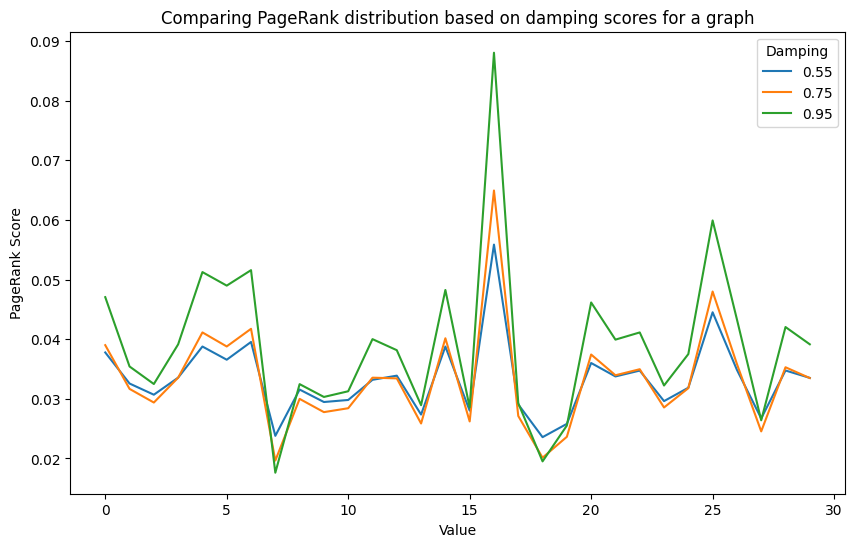

In [303]:
plt.figure(figsize=(10, 6))

plt.plot(score_1.keys(), score_1.values(), label=0.55)
plt.plot(score_2.keys(), score_2.values(), label=0.75)
plt.plot(score_3.keys(), score_3.values(), label=0.95)

plt.xlabel("Value")
plt.ylabel("PageRank Score")
plt.title("Comparing PageRank distribution based on damping scores for a graph")
plt.legend(title="Damping")
plt.show()

#### 5
My implemntation and NetworkX's implementation seem to be incredibly similar, given that we got a pearson correlation of 0.999999. Our approach must have been nearly identical. The damping factor's variance is clearly shown above. A higher damping score seems to have higher peaks as well as lower lows, evident by the steeper corners in the 0.95 distribution. The opposite is also true. The 0.55 distribution has a PageRank range much smaller than the 0.75 and 0.95 distribution's ranges.

# Part 2

In [304]:
#1
import torchvision.transforms as transforms
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

mnist_training_dataset = datasets.MNIST(root="./Data", train=True, download=True, transform=transform)
mnist_testing_dataset = datasets.MNIST(root="./Data", train=False, download=True, transform=transform)

#use dataloaders, because convention
#num_workers = my cpu cores - 1 (2 - 1 = 1)
mnist_train_dataloader = DataLoader(mnist_training_dataset, batch_size=16, shuffle=True, pin_memory=True, num_workers=1)
mnist_test_dataloader = DataLoader(mnist_testing_dataset, batch_size=16, shuffle=False, num_workers=1)

In [305]:
import torch
import torch.nn as nn
import torch.optim as optim

class MNISTClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.convolution_layer_1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5) 
        self.pool_layer = nn.MaxPool2d(kernel_size=2, padding=0, stride=2)
        self.convolution_layer_2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5)
        self.fullyconnected1 = nn.Linear(64*4*4, 256)
        self.fullyconnected2 = nn.Linear(256, 128)
        self.fullyconnected3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.convolution_layer_1(x)) #torch.relu as activation function
        x = self.pool_layer(x)
        x = torch.relu(self.convolution_layer_2(x))
        x = self.pool_layer(x)
        x = torch.flatten(x, start_dim=1) #needs to be flattened, start_dim=1
        x = torch.relu(self.fullyconnected1(x))
        x = torch.relu(self.fullyconnected2(x))
        x = self.fullyconnected3(x)
        return x

net = MNISTClassifier()
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [306]:
#3 Training

epochs = 2
interval = 2000

for epoch in range(epochs): #done according to instructions
    total_loss = 0
    for i, (image, t) in enumerate(mnist_train_dataloader):
        output = net(image) #forward pass
        temp_loss = loss(output, t)
        optimizer.zero_grad()
        temp_loss.backward() #back pass
        optimizer.step()
        total_loss += temp_loss.item()
        if (i+1) % 2000 == 0: #will only occur once per epoch, because each mini-batch is relatively small
            print(total_loss/interval)


0.16449759593687485
0.05109702364181248


In [307]:
#4 Testing
total = 0
correct = 0

net.eval()
with torch.no_grad():
    for i, t in mnist_test_dataloader:
        pred = net(i)
        _, pred_class = torch.max(pred, 1)
        total += t.size(0)
        correct += (pred_class == t).sum().item()

print("Accuracy:", (correct/total) * 100)


Accuracy: 99.0
